# 📚 Bibliotecas Utilizadas

Importação das bibliotecas necessárias para manipulação de geodados e visualização do mapa.

# 

In [25]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
from shapely import wkt
import os

# 📌 Dicionário de Bairros

Criação manual dos polígonos (em formato WKT) representando os bairros de Uberlândia.
Cada bairro está associado a uma zona territorial (Norte, Sul, Leste, Oeste ou Central).

In [26]:
# Dicionario Manual dos Poligonos

Dic_Bairros_Uberlandia = {
    'bairro': [
      'Aclimacao',
      'Alto Umuarama',
      'Alvorada',
      'Bom Jesus',
      'Brasil',
      'Carajas',
      'Cazeca',
      'Centro',
      'Chácaras Tubalina e Quartel',
      'Cidade Jardim',
      'Custodio Pereira',
      'Daniel Fonseca',
      'Distrito Industrial',
      'Dona Zumira',
      'Fundinho',
      'Gavea',
      'Granada',
      'Grand Ville',
      'Granja Marileusa',
      'Guarani',
      'Jaragua',
      'Jardim Brasilia',
      'Jardim Canaã',
      'Jardim das Palmeiras',
      'Jardim Europa',
      'Jardim Inconfidência',
      'Jardim Holanda',
      'Jardim Ipanema',
      'Jardim Karaiba',
      'Jardim Patricia',
      'Jardim Sul',
      'Lagoinha',
      'Laranjeiras',
      'Lidice',
      'Luizote de Freitas',
      'Mansour',
      'Maravilha',
      'Marta Helena',
      'Martins',
      'Minas Gerais',
      'Morada da Colina',
      'Morada do Sol',
      'Morada dos Passaros',
      'Morada Nova',
      'Morumbi',
      'Nossa Senhora Aparecida',
      'Nossa Senhora das Graças',
      'Novo Mundo',
      'Nova Uberlândia',
      'Osvaldo Rezende',
      'Pacaembu',
      'Pampulha',
      'Panorama',
      'Patrimonio',
      'Pequis',
      'Planalto',
      'Portal do Vale',
      'Presidente Roosevelt',
      'Residencial Gramado',
      'Residencial Integração',
      'Santa luzia',
      'Santa Mônica',
      'Santa Rosa',
      'São Jorge',
      'São José',
      'Saraiva',
      'Segismundo Pereira',
      'Shopping Park',
      'Tabajaras',
      'Taiaman',
      'Tibery',
      'Tocantins',
      'Tubalina',
      'Umuarama',
      'Vigilato Pereira',
      'Mansões Aeroporto'
    ],
    'zona_territorial': [
      'Leste',      # Aclimacao
      'Leste',      # Alto Umuarama
      'Leste',      # Alvorada
      'Central',    # Bom Jesus
      'Central',    # Brasil
      'Sul',        # Carajas
      'Central',    # Cazeca
      'Central',    # Centro
      'Oeste',      # Chácaras Tubalina e Quartel
      'Sul',        # Cidade Jardim
      'Leste',      # Custodio Pereira
      'Central',    # Daniel Fonseca
      'Norte',      # Distrito Industrial
      'Oeste',      # Dona Zumira
      'Central',    # Fundinho
      'Sul',        # Gavea
      'Sul',        # Granada
      'Leste',      # Grand Ville
      'Leste',      # Granja Marileusa
      'Oeste',      # Guarani
      'Oeste',      # Jaragua
      'Norte',      # Jardim Brasilia
      'Oeste',      # Jardim Canaã
      'Oeste',      # Jardim das Palmeiras
      'Oeste',      # Jardim Europa
      'Sul',      # Jardim Inconfidência
      'Oeste',        # Jardim Holanda
      'Leste',      # Jardim Ipanema
      'Sul',        # Jardim Karaiba
      'Oeste',      # Jardim Patricia
      'Sul',        # Jardim Sul
      'Sul',        # Lagoinha
      'Sul',        # Laranjeiras
      'Central',    # Lidice
      'Oeste',      # Luizote de Freitas
      'Oeste',      # Mansour
      'Norte',      # Maravilha
      'Norte',      # Marta Helena
      'Central',    # Martins
      'Norte',      # Minas Gerais
      'Sul',        # Morada da Colina
      'Oeste',      # Morada do Sol
      'Leste',      # Morada dos Passaros
      'Oeste',      # Morada Nova
      'Leste',      # Morumbi
      'Central',    # Nossa Senhora Aparecida
      'Norte',      # Nossa Senhora das Graças
      'Leste',        # Novo Mundo
      'Sul',      # Nova Uberlândia
      'Central',    # Osvaldo Rezende
      'Norte',      # Pacaembu
      'Sul',        # Pampulha
      'Oeste',      # Panorama
      'Sul',        # Patrimonio
      'Oeste',      # Pequis
      'Oeste',      # Planalto
      'Leste',      # Portal do Vale
      'Norte',      # Presidente Roosevelt
      'Norte',      # Residencial Gramado
      'Leste',      # Residencial Integração
      'Sul',        # Santa luzia
      'Leste',      # Santa Mônica
      'Norte',      # Santa Rosa
      'Sul',        # São Jorge
      'Norte',      # São José
      'Sul',        # Saraiva
      'Leste',      # Segismundo Pereira
      'Sul',        # Shopping Park
      'Central',    # Tabajaras
      'Oeste',      # Taiaman
      'Leste',      # Tibery
      'Oeste',      # Tocantins
      'Sul',        # Tubalina
      'Leste',      # Umuarama
      'Sul',        # Vigilato Pereira
      'Leste'       # Mansões Aeroporto

    ],
    'geometry': [
        wkt.loads('MULTIPOLYGON (((-48.23060097475918 -18.887871524128087,-48.22919599214567 -18.88472485177477,-48.22868089484595 -18.88496845536335,-48.223013655376214  -18.867966720698025,-48.22207437083831 -18.865150177122626,-48.224263292337476 -18.864500819038597,-48.224005916332516 -18.86352613321217,-48.228083179735194 -18.862186698607434,-48.22791146553959 -18.86263337957089,-48.233747482116065 -18.867913357227597,-48.23683659207565 -18.8770911224533,-48.24202939875059 -18.879284289315684,-48.243325908230354 -18.88232942763865,-48.242338987609685 -18.88279663164339,-48.239785450343625 -18.88527342886546,-48.23622332492671 -18.88671470824545, -48.23060097475918 -18.887871524128087)))'), #Aclimacao,
        wkt.loads('MULTIPOLYGON (((-48.234250878504504 -18.895882272721003,-48.233980220974544 -18.895523791792648,-48.23060097475918 -18.887871524128087,-48.23622332492671 -18.88671470824545,-48.239785450343625 -18.88527342886546,-48.242338987609685 -18.88279663164339,-48.243325908230354 -18.88232942763865,-48.24519276673959 -18.88204528361878,-48.24506403448364 -18.881720431128013,-48.247381490996425 -18.881030230114458,-48.24766037135345 -18.88125373872536,-48.24974173713412 -18.880644627504523,-48.249612994116504 -18.88031978515324,-48.25111498109134 -18.879934021027395,-48.25124372526505 -18.880157349197965,-48.25493431962831 -18.879223323368006,-48.25409754282139 -18.88131453676408,-48.252917438003 -18.88346664412483, -48.234250878504504 -18.895882272721003)))'), #Alto Umuarama
        wkt.loads('MULTIPOLYGON (((-48.19262098466966 -18.928423665178347,-48.190196244045296 -18.926495186409785,-48.19189158295076 -18.925541242470196,-48.191548293486285 -18.92481048151963,-48.194466764222135 -18.922861973976527,-48.19416636860853 -18.922476294349455,-48.20015321611044  -18.91539236982121,-48.200646727953384 -18.915189391629468,-48.20405844036983 -18.921603637102624, -48.19262098466966 -18.928423665178347)))'), # Alvorada
        wkt.loads('MULTIPOLYGON (((-48.27552947037113 -18.90977641466515,-48.269782143303864 -18.89855716731028,-48.269653452779345 -18.897440614478338,-48.270602958683014 -18.896070816686187,-48.271627630808176 -18.895349741106976,-48.2714988269328 -18.89693320295385,-48.271777736391606 -18.897887354262355,-48.27231414849756 -18.898557303815277,-48.2774424029429 -18.902576961964805,-48.27956671204459 -18.90312508963927,-48.27744205092035 -18.91003247596229,-48.276047470293726 -18.909682150342565, -48.27552947037113 -18.90977641466515)))'), #Bom Jesus
        wkt.loads('MULTIPOLYGON (((-48.26052346576402 -18.902386016586327,-48.257537992591914 -18.898233402680265,-48.252153872456596 -18.89437026012947,-48.25136286713061 -18.893501054505183,-48.25550774275614 -18.890853460276677,-48.26590811025804 -18.88444795489216,-48.27108797693137 -18.891521949087053,-48.271776958499785 -18.893549947258904,-48.271627630808176 -18.895349741106976,-48.270482937927255 -18.895777933485373, -48.26052346576402 -18.902386016586327)))'), #Brasil
        wkt.loads('MULTIPOLYGON (((-48.24595739378032 -18.935731215710046,-48.24477736593017 -18.92907379059419,-48.25756379634842 -18.926686498403615,-48.25463487321347 -18.929294723255854,-48.253111387170016 -18.933780346955103,-48.25180246235985 -18.933902132824475,-48.250461346767864 -18.934308065232962,-48.25009655873958 -18.934703850806287,-48.248965096780225 -18.935106294040104,-48.24818677803755 -18.93551570367973,        -48.24595739378032 -18.935731215710046)))'), #Carajas
        wkt.loads('MULTIPOLYGON (((-48.26680168658384 -18.918944037819653,-48.26211322129657 -18.91411274587626,-48.261973764664205 -18.913554512972915,-48.26226351877375 -18.911423105540166,-48.26358317312736 -18.911260766244997,-48.264870618917534 -18.91161604474474,-48.267676269571865 -18.913970927415576,-48.27002187558348 -18.915882765478315,-48.27094309211387 -18.91619351826692,                   -48.26680168658384 -18.918944037819653)))'), #Cazeca
        wkt.loads('MULTIPOLYGON (((-48.27889929489224 -18.924058803927686,-48.277618181948334 -18.92378569298799,-48.27599425119249 -18.92260798281234,-48.26904753039807 -18.917452977117662,-48.27094309211387 -18.91619351826692,-48.27002187558348 -18.915882765478315,-48.267676269571865 -18.913970927415576,-48.275096443295396 -18.90895706804525,-48.27552947037113 -18.90977641466515,-48.276047470293726 -18.909682150342565,-48.27744205092035 -18.91003247596229,-48.27655791250938 -18.912780650158513,-48.278614879769556 -18.91556296156843,-48.27958923790573 -18.914948458747144,-48.280870338594326 -18.916791948742127,-48.28455127974502 -18.919522961145333,-48.28363388171755 -18.92018626161959,-48.279101985612435 -18.923295248897887,                     -48.27889929489224 -18.924058803927686)))'), #Centro
        wkt.loads('MULTIPOLYGON (((-48.30356370707371 -18.926278233747823,-48.31263976360196 -18.916242140652802,-48.31366561535343 -18.9171685786225,-48.3169405432202 -18.919165649672507,-48.31827577387016 -18.919464356327317,-48.318925350483454 -18.920044695346014,-48.321736245540805 -18.920592687471434,-48.32285495382472 -18.92183015515652,-48.32511944250997 -18.9230847005651,-48.32857480038982 -18.92561935295263,-48.32873720655212 -18.927582193946712,-48.328069581840765 -18.931209110078065,-48.32834230925591 -18.931863425745707,     -48.32866502099996 -18.932608662178925,-48.328944695959954 -18.93286467260013,-48.32846654148528 -18.9348274201574,-48.327835010874225 -18.934759149452134,-48.32727565047258 -18.935305302538612,-48.32754630417529 -18.935825859248816,-48.32714031468585 -18.936073334317342,-48.326193023392 -18.935109017974646,-48.32581409528449 -18.935518630824237,-48.32588626667147 -18.935757575499103,-48.325444175863105 -18.936414665945783,-48.32556144796253 -18.937071765207566,-48.3232519168031 -18.940126733609883,-48.32149261462067 -18.942430749341842,-48.32144749489509 -18.942976891619434,-48.32127607599803 -18.942942756096897,-48.32128513823899 -18.94064725746116,-48.32031980622174 -18.929442602636982, -48.30838801294037 -18.92724618752379,-48.30356370707371 -18.926278233747823)))'),  #Chácaras Tubalina e Quartel
        wkt.loads('MULTIPOLYGON (((-48.30740154790278 -18.93910216445091,-48.30580467091838 -18.940902708439683,-48.30100500397979 -18.941884006590485,-48.29782025121574 -18.94302744641007,-48.29349890990749 -18.93550940956809,-48.29420261881222 -18.934690297507412,-48.29430187378476 -18.930705044322092,-48.29331848703644 -18.929433508427326,-48.29322826481497 -18.929937003336256,-48.29316506597502 -18.93364066914279,-48.29199221517437 -18.93631171545459,-48.29095467151989 -18.93687493133311,-48.28955633021164 -18.93865842435904,-48.28943002121185 -18.938786426620823,-48.288487485521784 -18.941021617111947,-48.287418139755395 -18.945988513285045,-48.28767979571015 -18.947140463794863,-48.286892906134184 -18.94956772159232,-48.28713849028116 -18.949913659489553,-48.292389241726646 -18.951330116925476,-48.294798050873275 -18.95040857675794,-48.2960250327393 -18.950348831944613,-48.29755872757225 -18.95072429151878,-48.299687877010705 -18.950280589266605,-48.301194525843634 -18.951449583349742,-48.30471303956658 -18.952866024363104,-48.306995573307574 -18.95313904978157,                                  -48.30740154790278 -18.93910216445091)))'), #Cidade Jardim
        wkt.loads('MULTIPOLYGON (((-48.22169255163737 -18.91112626193378,-48.21961759023586 -18.90767805244072,-48.22539156916771 -18.902335181127537,-48.22623963861672 -18.90127671159708,-48.233980220974544 -18.895523791792648,-48.234250878504504 -18.895882272721003,-48.250941341217995 -18.884785597345836,-48.25550774275614 -18.890853460276677, -48.25136286713061 -18.893501054505183,                    -48.22169255163737 -18.91112626193378)))'), #Custodio Pereira
        wkt.loads('MULTIPOLYGON (((-48.29635322332782 -18.926917912154643,-48.29838248165125 -18.924770275816012,-48.29977146487432 -18.92126162415223, -48.301235000937815 -18.9213686759195, -48.30269853521777 -18.92063405106381,-48.304617233196645 -18.917939905131,-48.30492395597898 -18.91520880047966, -48.30712528715213 -18.913109300812973,-48.306943914025254 -18.911612110896915,-48.30600315013925 -18.910291648008215,-48.30363626136441 -18.910550142602236,-48.29337962317927 -18.922492229558777,-48.29080013853323 -18.923181136948827, -48.29635322332782 -18.926917912154643)))'), #Daniel Fonseca
        wkt.loads('MULTIPOLYGON (((-48.3004680761658 -18.88075325503842,-48.29694907583098 -18.877931192983674,-48.29503321953797 -18.876969884006048,-48.29636750454635 -18.875361944935406,-48.28875304657827 -18.869181269539826,-48.28445862566575 -18.8637857978869,-48.28097622788205 -18.863512565794107,-48.27507569744851 -18.86720044386187,-48.27485913184686 -18.867695596918328,-48.27393894426602 -18.8664320279535,-48.27417357929264 -18.865561235801177,-48.27462836071941 -18.86501805766056,  -48.27442625370804 -18.864690445446087,-48.2717374761808 -18.86663679030833,-48.28110259829168 -18.85193552045969,-48.2910268114985 -18.836644367420774,-48.307843477656775 -18.84615609771753,-48.34008420492945 -18.871651247658225,-48.34140135651475 -18.87467325694969,-48.339614996185425 -18.877080593148843,-48.33304710697336 -18.8787537368942,-48.33179863907648 -18.881535679022168, -48.329871170733526 -18.8833463739874,-48.325865297058535 -18.882373046095832,-48.3213728252856 -18.885446145613006,-48.3198928726452 -18.891711737040282,-48.31872026506688 -18.891865358226067, -48.316410855004364 -18.891045895963202,-48.31559887409205 -18.892070209561744, -48.308579856841526 -18.889219016479995,                                -48.3004680761658 -18.88075325503842)))'), #Distrito Industrial
        wkt.loads('MULTIPOLYGON (((-48.31263976360196 -18.916242140652802,-48.30712528715213 -18.913109300812973,-48.306943914025254 -18.911612110896915, -48.30600315013925 -18.910291648008215,-48.31305217242567 -18.908272364874758,-48.322442434200184 -18.905568594933154,-48.32611691553241 -18.905785690441295,-48.322059766688746 -18.908827559193195,-48.3176452792369 -18.910855412702304,                               -48.31263976360196 -18.916242140652802)))'), #Dona Zumira
        wkt.loads('MULTIPOLYGON (((-48.28363388171755 -18.92018626161959,-48.279101985612435 -18.923295248897887, -48.27889929489224 -18.924058803927686,-48.281790424228205 -18.92476286773909,-48.28070775871145 -18.927032946575622,-48.281859500902065 -18.928017366178832,-48.28110659329741 -18.92845297902425,-48.28125094238073 -18.92855538818211,-48.28371391258806 -18.92853832274769,-48.284435655795235 -18.927881199318527,-48.28457998148891 -18.92548313814994,-48.28524759033289 -18.925448992180566,-48.28532880233054 -18.92123306901316,                       -48.28363388171755 -18.92018626161959)))'), #'Fundinho
        wkt.loads('MULTIPOLYGON (((-48.27378035198408 -18.96607749402995,-48.273781459671746 -18.951785089847178,-48.27795610427034 -18.951634116211558,-48.28391897375054 -18.949639493350297,-48.286892906134184 -18.94956772159232, -48.28713849028116 -18.949913659489553, -48.292389241726646 -18.951330116925476,-48.292248900962896 -18.952322952386705,-48.29051923372165 -18.955523102677315,-48.290913686609116 -18.95751772864725,-48.29138457058522 -18.958929278820122, -48.290761968297716 -18.962439671853588,-48.29243096926889 -18.9650082118034,-48.29282548839622 -18.969872549961455,-48.2866045988394 -18.96505124691315,-48.28302381641766 -18.964419821961044,                                    -48.27378035198408 -18.96607749402995)))'),  #Gavea
        wkt.loads('MULTIPOLYGON (((-48.252238215172326 -18.955890593436735,-48.23724053895638 -18.95040468859547,-48.23081615196894 -18.94799854970815,-48.23179846659518 -18.947093470417908,-48.238509729417764 -18.942435467685787,-48.2385948995047 -18.942502756710027,-48.240658392904116 -18.941110682445597,-48.24048390454327 -18.940780606629293,-48.24230465285489 -18.940077387441303,-48.24766824545211 -18.93968987436814,-48.24792620003111 -18.94151968773687,-48.24863176396429 -18.94361495062668,-48.24899591843452 -18.943729755563407,-48.248942790656685 -18.944497551838335,-48.24911728030846 -18.945050062706787,-48.25186358463149 -18.947905876648466,-48.2525691202191 -18.95485864996386,                          -48.252238215172326 -18.955890593436735)))'), #Granada
        wkt.loads('MULTIPOLYGON (((-48.22169255163737 -18.91112626193378, -48.21961759023586 -18.90767805244072, -48.22539156916771 -18.902335181127537, -48.22623963861672 -18.90127671159708,-48.2258324302356 -18.901096327537413,-48.22332439411795 -18.89493373958859,-48.222801145317675 -18.894524030057983,-48.22191701129837 -18.896231117690007,-48.2127866167697 -18.901266688219778,-48.21325775842335 -18.905879754346824,-48.21404977710421 -18.91135545522465,-48.21493389543892 -18.9126015970656,-48.21459104119826 -18.9128917804793,-48.216611969961995 -18.91410380392703,                               -48.22169255163737 -18.91112626193378)))'), #Grand Ville
        wkt.loads('MULTIPOLYGON (((-48.25493431962831 -18.879223323368006, -48.25124372526505 -18.880157349197965, -48.25111498109134 -18.879934021027395, -48.249612994116504 -18.88031978515324, -48.24974173713412 -18.880644627504523, -48.24766037135345 -18.88125373872536,  -48.247381490996425 -18.881030230114458, -48.24506403448364 -18.881720431128013, -48.24519276673959 -18.88204528361878, -48.243325908230354 -18.88232942763865, -48.24202939875059 -18.879284289315684,-48.23683659207565 -18.8770911224533, -48.233747482116065 -18.867913357227597, -48.22791146553959 -18.86263337957089,-48.2292878018751 -18.86287956060709,-48.230947820875954 -18.862691773288784,-48.23242740250815 -18.861496570190194,-48.233167186684355 -18.860318426535347,-48.23466481740315 -18.859840092828662,-48.24276642349199 -18.858337721527718, -48.2422611984022 -18.856476495553824,-48.24249577121737 -18.85543490905106,-48.24319946838152 -18.85458115014865,-48.24330772925672 -18.854154268875945,-48.24541894275801 -18.85466650810686,-48.24911780100021 -18.856169174234992,-48.2539354253588 -18.858371799465274,-48.25415189890252 -18.861206257325478,-48.25451293918987 -18.867250627710355,-48.25492785363587 -18.86885565550092,-48.25610068674502 -18.871006943526247,-48.2589743681906 -18.87499227912764, -48.25970956560995 -18.87594120830282,-48.25514008769796 -18.8787398537085,                           -48.25493431962831 -18.879223323368006)))'), #Granja Marileusa
        wkt.loads('MULTIPOLYGON (((-48.337726876452614 -18.89189580597738, -48.33179863907648 -18.881535679022168, -48.329871170733526 -18.8833463739874, -48.325865297058535 -18.882373046095832, -48.3213728252856 -18.885446145613006, -48.3198928726452 -18.891711737040282,-48.32415538699464 -18.898559168322407,-48.3254906015395 -18.90006644555258,                              -48.337726876452614 -18.89189580597738)))'), #Guarani
        wkt.loads('MULTIPOLYGON (((-48.30611488437124 -18.937209763585116, -48.3005033160611 -18.92944401062685, -48.29635322332782 -18.926917912154643,-48.29838248165125 -18.924770275816012,         -48.29977146487432 -18.92126162415223, -48.301235000937815 -18.9213686759195,-48.30269853521777 -18.92063405106381,               -48.304617233196645 -18.917939905131, -48.30492395597898 -18.91520880047966, -48.30712528715213 -18.913109300812973, -48.31263976360196 -18.916242140652802, -48.30356370707371 -18.926278233747823, -48.30838801294037 -18.92724618752379, -48.30611488437124 -18.937209763585116)))'), #Jaragua
        wkt.loads('MULTIPOLYGON (((-48.31559887409205 -18.892070209561744, -48.308579856841526 -18.889219016479995 ,-48.305534862942714 -18.891351024610525,-48.30063560686704 -18.891302687259806,-48.295021851246524 -18.890505734760488,-48.29619493317372 -18.903977399191966,-48.29530217347665 -18.904387672666623,-48.29499591041677 -18.90537747956685,-48.298313269111084 -18.90726062005003,-48.3025237617599 -18.908612406333944,-48.30363626136441 -18.910550142602236, -48.30600315013925 -18.910291648008215,-48.304947984770735 -18.90960220330487,-48.30482039073132 -18.907260516427062, -48.30543280609137 -18.90433944775468,                                     -48.31559887409205 -18.892070209561744)))'), #Jardim Brasilia
        wkt.loads('MULTIPOLYGON (((-48.34431269749136 -18.964844199749436,-48.33612975030785 -18.96870062528086,-48.336725195182105 -18.96918697159617,-48.33658094271773 -18.97021077097135,-48.33529986315273 -18.970714190384495,-48.33338724186048 -18.9692978647401,-48.32367970849632 -18.973324895566403,-48.32117168116103 -18.971371145695073,-48.32048602198873  -18.971550309530414,-48.31913276044426 -18.970483824030723, -48.31780653891061 -18.971081024238032,-48.31717501233658 -18.97080799152286,-48.31748177608669 -18.96992069144174,-48.31797794802588 -18.969366114057127,-48.31819447617281 -18.9684788019103,-48.31878091864698 -18.967369663851212,-48.31956579613802 -18.965902138424227,-48.3214783875154 -18.963530200358253,-48.32299410677526 -18.96176405787568,-48.32321963798163  -18.960569533577594,-48.323201601449604 -18.96014291643287,-48.324897708126265 -18.959699256119176,-48.3248074824906 -18.95533914665995,-48.325029070532906 -18.950960262184633,                           -48.34290531030493 -18.964477331552125,  -48.34431269749136 -18.964844199749436)))'), #Jardim Canaa
        wkt.loads('MULTIPOLYGON (((-48.30684392874114 -18.960979370242214,-48.30740154790278 -18.93910216445091, -48.32144749489509 -18.942976891619434,-48.322115855693596 -18.945722237447573,-48.32305657640619 -18.947358231957637,-48.324862161329214 -18.95038623224654,-48.325029070532906 -18.950960262184633,-48.32458907256821 -18.950773664596593,-48.31384657304779 -18.948879248556178,               -48.30684392874114 -18.960979370242214)))'), #jardim das Palmeiras
        wkt.loads('MULTIPOLYGON (((-48.32144749489509 -18.942976891619434, -48.32149261462067 -18.942430749341842, -48.3232519168031 -18.940126733609883,-48.32556144796253 -18.937071765207566, -48.325444175863105 -18.936414665945783, -48.32588626667147 -18.935757575499103, -48.32581409528449 -18.935518630824237, -48.326193023392 -18.935109017974646, -48.32714031468585 -18.936073334317342, -48.32754630417529 -18.935825859248816, -48.32727565047258 -18.935305302538612, -48.327835010874225 -18.934759149452134, -48.32846654148528 -18.9348274201574, -48.328944695959954 -18.93286467260013,-48.32834230925591 -18.931863425745707,-48.33551453755874 -18.933527763804516,-48.34277795687665 -18.935217457272568, -48.3468388197482 -18.936450467666322,-48.34886772428187 -18.940092376181827,-48.35033828000658 -18.942720642492873,-48.351339703436004 -18.945237930627066,-48.35263884780794 -18.949077785035396,-48.35439810483205 -18.952294668086157,                              -48.32144749489509 -18.942976891619434)))'), #jardim Europa
        wkt.loads('MULTIPOLYGON (((-48.26732675263454 -18.936087737679813, -48.266901913220536 -18.93628866467597, -48.26640120956197 -18.936740745951003, -48.26615844307508 -18.936855560235056, -48.265854984262305 -18.93776688677718, -48.2658549833265 -18.93816873152776, -48.26528600031595 -18.93894371274067, -48.26353353352651 -18.94073046063854, -48.26335146066639 -18.94148390529856, -48.26128032984781 -18.942847266413807, -48.26068862296278 -18.943794435121927, -48.25696365323578 -18.946887043599656, -48.255461572776454 -18.947913144094272, -48.25470293104119 -18.94938408859804, -48.25347391081493 -18.95095546468599, -48.25321596841933 -18.951005689116688, -48.25304148335531 -18.950697149786976, -48.25299597584752 -18.949958094984297, -48.25396705060072 -18.948372364400953, -48.25244977759649 -18.947339093894026, -48.25186358463149 -18.947905876648466, -48.24911728030846 -18.945050062706787, -48.248942790656685 -18.944497551838335, -48.24899591843452 -18.943729755563407, -48.24863176396429 -18.94361495062668, -48.24792620003111 -18.94151968773687, -48.24766824545211 -18.93968987436814, -48.24931785228422 -18.9394857338091, -48.24899251962771 -18.935519024600698, -48.25009655873958 -18.934703850806287,-48.250461346767864 -18.934308065232962, -48.25180246235985 -18.933902132824475, -48.253111387170016 -18.933780346955103, -48.25612279570736 -18.93347705169645, -48.25894249513704 -18.933102930068337, -48.26153251011831 -18.93357359538533,-48.263883379332164 -18.93450040306587,-48.26429106222667 -18.93514990013613,    -48.2664797435199  -18.93559645031915,                                -48.26732675263454 -18.936087737679813)))'), #jardim inconfidência
        wkt.loads('MULTIPOLYGON (((-48.31717501233658 -18.97080799152286, -48.31748177608669 -18.96992069144174, -48.31797794802588 -18.969366114057127, -48.31819447617281 -18.9684788019103, -48.31878091864698 -18.967369663851212, -48.31956579613802 -18.965902138424227, -48.3214783875154 -18.963530200358253, -48.32299410677526 -18.96176405787568, -48.32321963798163 -18.960569533577594, -48.323201601449604 -18.96014291643287, -48.324897708126265 -18.959699256119176 -48.324897708126265 -18.959699256119176, -48.3248074824906 -18.95533914665995, -48.325029070532906 -18.950960262184633, -48.32458907256821 -18.950773664596593, -48.31384657304779 -18.948879248556178,-48.30684392874114 -18.960979370242214,-48.30676746617304 -18.967905510224657,-48.30737956617103 -18.970724653981524, -48.308725711253686 -18.97027503882891,-48.310971283754405 -18.969442535431718,-48.31440341271929 -18.970021698608818,-48.31706998141955 -18.970902515096697,                         -48.31717501233658 -18.97080799152286)))'), #Jardim Holanda
        wkt.loads('MULTIPOLYGON (((-48.222801145317675 -18.894524030057983,-48.22332439411795 -18.89493373958859,-48.2258324302356 -18.901096327537413, -48.22623963861672 -18.90127671159708, -48.233980220974544 -18.895523791792648, -48.23060097475918 -18.887871524128087, -48.22919599214567 -18.88472485177477, -48.22868089484595 -18.88496845536335, -48.223013655376214  -18.867966720698025,-48.221353650457814 -18.868974048325242,-48.21664405321949 -18.873259423124395,-48.2175281310707 -18.875154658820488,-48.216788493545586 -18.875444948498206,-48.21608481442297 -18.874283928047706,-48.2130715324196 -18.872610599401682,-48.21036503406981 -18.87657180743747, -48.20718916399157 -18.88114731364515,-48.20509589747819 -18.882939935842984,-48.207802640896524 -18.882666750970188,-48.2139737191752 -18.88230834937961,-48.21469547435169 -18.882120551333067,-48.21483982426345 -18.882410790041245,-48.21774491321483 -18.884493606657212,-48.216842695106784 -18.886115445879128,-48.22061380340168 -18.887788579210373,                                        -48.222801145317675 -18.894524030057983)))'), #Jardim Ipanema
        wkt.loads('MULTIPOLYGON (((-48.252238215172326 -18.955890593436735,-48.2525691202191 -18.95485864996386, -48.25186358463149 -18.947905876648466,-48.25244977759649 -18.947339093894026, -48.25396705060072 -18.948372364400953, -48.25299597584752 -18.949958094984297, -48.25304148335531 -18.950697149786976, -48.25321596841933 -18.951005689116688,-48.25347391081493 -18.95095546468599, -48.25470293104119 -18.94938408859804, -48.255461572776454 -18.947913144094272, -48.25696365323578 -18.946887043599656, -48.26068862296278 -18.943794435121927, -48.26128032984781 -18.942847266413807,-48.26335146066639 -18.94148390529856, -48.26353353352651 -18.94073046063854, -48.26528600031595 -18.93894371274067, -48.2658549833265 -18.93816873152776, -48.265854984262305 -18.93776688677718,-48.26615844307508 -18.936855560235056, -48.26640120956197 -18.936740745951003, -48.266901913220536 -18.93628866467597, -48.26732675263454 -18.936087737679813,-48.268910796854136 -18.935302641600703,-48.270531158338045 -18.935562118895803,-48.27155826137814 -18.934765351950787,-48.273982419434056 -18.934174032789016,-48.27479897289883 -18.934620562327176,-48.27379102835631 -18.936491145636467, -48.273781459671746 -18.951785089847178,-48.27209974908062 -18.951903197012726,-48.26987971121964 -18.95291686515895,-48.268170009941926 -18.953640898139433,-48.26625617274302 -18.952892711628348,-48.26441895888537 -18.950044807237905,-48.26301545957108 -18.950841203902847,-48.25918769414416 -18.951758153895344,-48.25275723610859 -18.95588517592825,                             -48.252238215172326 -18.955890593436735)))'), #Jardim Karaiba
        wkt.loads('MULTIPOLYGON (((-48.32611691553241 -18.905785690441295, -48.322059766688746 -18.908827559193195, -48.3176452792369 -18.910855412702304, -48.31263976360196 -18.916242140652802,-48.31366561535343 -18.9171685786225, -48.3169405432202 -18.919165649672507, -48.31827577387016 -18.919464356327317, -48.318925350483454 -18.920044695346014, -48.321736245540805 -18.920592687471434,-48.321848002969894 -18.920526345671405,-48.322506610775235 -18.919203508792023,-48.32570896364832 -18.912879579147038,-48.32863730959253 -18.91590821534379,-48.33564716439775 -18.909477727502523,-48.3328705504066 -18.908645201481864,-48.33192985209034 -18.907611704964065,-48.33124702078868 -18.906434662655144,                           -48.32611691553241 -18.905785690441295)))'), #Jardim Patricia
        wkt.loads('MULTIPOLYGON (((-48.27378035198408 -18.96607749402995, -48.273781459671746 -18.951785089847178, -48.27209974908062 -18.951903197012726, -48.26987971121964 -18.95291686515895, -48.268170009941926 -18.953640898139433, -48.26625617274302 -18.952892711628348, -48.26441895888537 -18.950044807237905, -48.26301545957108 -18.950841203902847, -48.25918769414416 -18.951758153895344, -48.25275723610859 -18.95588517592825, -48.252238215172326 -18.955890593436735,-48.25080634382074 -18.964058866085832,-48.248712880846526 -18.97569110372532,-48.25177521796726 -18.975112053892005,-48.26532528642275 -18.969296412845896,-48.26681083540514 -18.9687022407988, -48.27106147130623 -18.96694780263106,                  -48.27378035198408 -18.96607749402995)))'), #Jardim Sul
        wkt.loads('MULTIPOLYGON (((-48.26153251011831 -18.93357359538533, -48.25894249513704 -18.933102930068337, -48.25612279570736 -18.93347705169645, -48.253111387170016 -18.933780346955103, -48.25463487321347 -18.929294723255854,-48.25756379634842 -18.926686498403615,-48.26333508223785 -18.928304846914916,                        -48.26153251011831 -18.93357359538533)))'), #Lagoinha
        wkt.loads('MULTIPOLYGON (((-48.252238215172326 -18.955890593436735, -48.25080634382074 -18.964058866085832, -48.248712880846526 -18.97569110372532,-48.22962324905986 -18.973210247114174,-48.23045285109762 -18.966501637426457,-48.23107798995204 -18.961626843462064,-48.23243045635988 -18.95600378429602,-48.23724053895638 -18.95040468859547,             -48.252238215172326 -18.955890593436735 )))'), #Laranjeiras
        wkt.loads('MULTIPOLYGON (((-48.26680168658384 -18.918944037819653, -48.26904753039807 -18.917452977117662, -48.27599425119249 -18.92260798281234, -48.277618181948334 -18.92378569298799, -48.27889929489224 -18.924058803927686,-48.28096980867393 -18.924550454616327,-48.27775458014345 -18.929897006594235,-48.27520282950105 -18.92786939681939,-48.27382487273301 -18.926384949240866,-48.2715114533906 -18.92432468161228, -48.27057137815086 -18.9228124913594,                   -48.26680168658384 -18.918944037819653)))'), #Lidice
        wkt.loads('MULTIPOLYGON (((-48.32857480038982 -18.92561935295263, -48.32511944250997 -18.9230847005651, -48.32285495382472 -18.92183015515652, -48.321736245540805 -18.920592687471434, -48.321848002969894 -18.920526345671405, -48.322506610775235 -18.919203508792023, -48.32570896364832 -18.912879579147038, -48.32863730959253 -18.91590821534379, -48.33564716439775 -18.909477727502523,-48.33815762499507 -18.910294795502296,-48.34017346915707 -18.912250116063213,-48.34083694427363 -18.915412402389062,-48.34030105662427 -18.919926481097512,-48.34055626562922 -18.92477832352102,-48.341577019407616 -18.92719217312013,-48.3379279126905 -18.926130082688825,-48.33468711168223 -18.925888651774503,-48.33188011860283 -18.925357520891712,-48.32909856724602 -18.925719484466633,-48.32857480038982 -18.92561935295263,      	                -48.32857480038982 -18.92561935295263)))'), #Luizote de Freitas
        wkt.loads('MULTIPOLYGON (((-48.341577019407616 -18.92719217312013, -48.3379279126905 -18.926130082688825, -48.33468711168223 -18.925888651774503, -48.33188011860283 -18.925357520891712, -48.32909856724602 -18.925719484466633, -48.32857480038982 -18.92561935295263, -48.32873720655212 -18.927582193946712, -48.328069581840765 -18.931209110078065, -48.32834230925591 -18.931863425745707, -48.33551453755874 -18.933527763804516, -48.34277795687665 -18.935217457272568, -48.3468388197482 -18.936450467666322,                  -48.341577019407616 -18.92719217312013)))'), #Mansour
        wkt.loads('MULTIPOLYGON (((-48.290060802691016 -18.891148245959492, -48.3004680761658 -18.88075325503842, -48.308579856841526 -18.889219016479995, -48.305534862942714 -18.891351024610525, -48.30063560686704 -18.891302687259806, -48.295021851246524 -18.890505734760488,-48.29293350200985 -18.89109021351585,-48.29190500208683 -18.891235310836436,                      -48.290060802691016 -18.891148245959492)))'), #Maravilha
        wkt.loads('MULTIPOLYGON (((-48.271627630808176 -18.895349741106976, -48.271776958499785 -18.893549947258904, -48.27108797693137 -18.891521949087053, -48.26590811025804 -18.88444795489216, -48.25970956560995 -18.87594120830282, -48.2589743681906 -18.87499227912764, -48.2717374761808 -18.86663679030833, -48.27442625370804 -18.864690445446087, -48.27462836071941 -18.86501805766056, -48.27417357929264 -18.865561235801177, -48.27393894426602 -18.8664320279535, -48.27485913184686 -18.867695596918328,-48.27168231121066 -18.87254081605748,-48.27014984710987  -18.87363194699195,-48.27022860671546 -18.880544223188068,-48.2703944538818 -18.881353078921734,-48.27634037206426 -18.889782901673893,-48.27652245396296 -18.891117971090022,-48.27608244485271 -18.89210850922669,  -48.274485725794655 -18.893253921361712,                               -48.271627630808176 -18.895349741106976)))'), #marta Helena
        wkt.loads('MULTIPOLYGON (((-48.28455127974502 -18.919522961145333,-48.280870338594326 -18.916791948742127, -48.27958923790573 -18.914948458747144, -48.278614879769556 -18.91556296156843, -48.27655791250938 -18.912780650158513, -48.27744205092035 -18.91003247596229, -48.27956671204459 -18.90312508963927,-48.288059609002026 -18.904955546406395,-48.289334120004774 -18.9048981081222,                      -48.28455127974502 -18.919522961145333)))'), #martins
        wkt.loads('MULTIPOLYGON (((-48.28110259829168 -18.85193552045969,-48.2717374761808 -18.86663679030833, -48.2589743681906 -18.87499227912764, -48.25610068674502 -18.871006943526247, -48.25492785363587 -18.86885565550092, -48.25451293918987 -18.867250627710355, -48.25415189890252 -18.861206257325478, -48.2539354253588 -18.858371799465274,-48.257500804279026 -18.86005374296407,-48.26007810680947 -18.86048856040955, -48.26217058556849 -18.86015059892012,-48.26446720453491 -18.858967461344612,-48.276664523498354 -18.8523992351087,-48.278629332043835 -18.851771357826536, -48.279854150968895  -18.85172303570179,                                   -48.28110259829168 -18.85193552045969)))'), #Minas Gerais
        wkt.loads('MULTIPOLYGON (((-48.288487485521784 -18.941021617111947, -48.287418139755395 -18.945988513285045, -48.28767979571015 -18.947140463794863, -48.286892906134184 -18.94956772159232, -48.28391897375054 -18.949639493350297, -48.27795610427034 -18.951634116211558, -48.273781459671746 -18.951785089847178, -48.27379102835631 -18.936491145636467, -48.27479897289883 -18.934620562327176, -48.27775458014345 -18.929897006594235,-48.278969476997936 -18.93064298380614,-48.28164878798457 -18.931849819766246,-48.28284810697206 -18.93211530748614,-48.28292469487045 -18.93392557666006,-48.282414379980345 -18.93604963534558,-48.28164886667836 -18.93785991787183,-48.28124059139182 -18.9392598700697, -48.28545119406726 -18.94024942137014,                             -48.288487485521784 -18.941021617111947)))'), #Morada da Colina
        wkt.loads('MULTIPOLYGON (((-48.36402966655177 -18.900207004310435,-48.357564362416646 -18.9011062523763,-48.346503259061166 -18.902613376729974,-48.341465511816 -18.904450574902704,-48.341283533168536 -18.903072485349096,-48.34099536721962 -18.89794801290424,-48.34069214931598 -18.89006704580047,-48.34583573675816 -18.886722157864327,-48.34931032377755 -18.884497022235156,-48.34944687992832 -18.881683207303933,-48.350023436179136 -18.88109460317239,-48.3503420677676 -18.883405941931326,-48.357942973323674 -18.87825221433909,-48.359202291995054 -18.883291363172493,-48.356228421438416 -18.891316290973425,                                    -48.36402966655177 -18.900207004310435)))'), #Morada do Sol
        wkt.loads('MULTIPOLYGON (((-48.224005916332516 -18.86352613321217, -48.224263292337476 -18.864500819038597, -48.22207437083831 -18.865150177122626, -48.223013655376214 -18.867966720698025, -48.221353650457814 -18.868974048325242, -48.21664405321949 -18.873259423124395, -48.2175281310707 -18.875154658820488, -48.216788493545586 -18.875444948498206, -48.21608481442297 -18.874283928047706, -48.2130715324196 -18.872610599401682,-48.21358555321289 -18.87142618255686,-48.213942804907596 -18.869675597243795,-48.21370039593586 -18.867768055272442,-48.21273071138437 -18.86628302265753, -48.208915829236474 -18.86267304541834,-48.20799720559369 -18.8604273591483,-48.20821409242537 -18.858483438182457,-48.20885204601371  -18.857034571323773,-48.210370332750216 -18.855464961907145,-48.212564921758975 -18.8547404526213,-48.221023873182645 -18.854511069286286,                        -48.224005916332516 -18.86352613321217)))'), #Morada dos Passaros
        wkt.loads('MULTIPOLYGON (((-48.387313479706606 -18.993223789327658,-48.380516025865234 -19.007225744716337,-48.371274675575556 -19.005937352918735,-48.3701518941002 -19.00485169000597,-48.36822541663025 -19.001256789167645,-48.36409161517663 -18.995321388976592,-48.362190522852764 -18.99019410788168,-48.36229265009569 -18.98833618850528,-48.36369603185856 -18.985295893210612,-48.36341535519871 -18.984668512823664,-48.36037885982599 -18.980831727797767,-48.366745484695706 -18.974111540366188,-48.3678662713596 -18.976058241488847,-48.368888974145506 -18.977707072343666,-48.37311208615883 -18.98498232291595,-48.37682488372494 -18.9831604993782,-48.37753938790653 -18.984391117996072,-48.37997635137155 -18.98449967198053,-48.38066529918349 -18.987250433100815,-48.378588753122436 -18.98914944101195,-48.37809563397895 -18.989608540328202,-48.38733589086389 -18.993216805439527,                                              -48.387313479706606 -18.993223789327658)))'), #Morada Nova
        wkt.loads('MULTIPOLYGON (((-48.20015321611044 -18.91539236982121, -48.19416636860853 -18.922476294349455, -48.194466764222135 -18.922861973976527, -48.191548293486285 -18.92481048151963, -48.19189158295076 -18.925541242470196, -48.190196244045296 -18.926495186409785,-48.18026683158883 -18.919223687165964,-48.1723638033975 -18.912395900637684,-48.17498011725007 -18.90978425379383,-48.17795734051117 -18.908111523895705,-48.18053752747583 -18.90715557100936,-48.18387558121033 -18.90473166909711,-48.187646593533835 -18.902666143352498,-48.192049409819425 -18.910450088056344, -48.19322683560538 -18.911140145772578,                            -48.20015321611044 -18.91539236982121)))'), #Morumbi
        wkt.loads('MULTIPOLYGON (((-48.26052346576402 -18.902386016586327,   -48.270482937927255 -18.895777933485373, -48.271627630808176 -18.895349741106976, -48.270602958683014 -18.896070816686187, -48.269653452779345 -18.897440614478338, -48.269782143303864 -18.89855716731028, -48.275096443295396 -18.90895706804525, -48.267676269571865 -18.913970927415576, -48.264870618917534 -18.91161604474474, -48.26358317312736 -18.911260766244997, -48.26226351877375 -18.911423105540166,-48.26220343591104 -18.909656585219764,-48.26155389880737 -18.907539921428757,-48.260814062047984 -18.903238170308946,                    -48.26052346576402 -18.902386016586327)))'), #Nossa Senhora Aparecida
        wkt.loads('MULTIPOLYGON (((-48.27022860671546 -18.880544223188068, -48.27014984710987 -18.87363194699195, -48.27485913184686 -18.867695596918328,-48.27507569744851 -18.86720044386187, -48.28097622788205 -18.863512565794107, -48.28445862566575 -18.8637857978869, -48.28875304657827 -18.869181269539826,-48.28510333586752 -18.871643557711135,-48.28014222544435 -18.875027111294948,-48.27570212085987 -18.87792454016192, -48.2703944538818  -18.881353078921734,              -48.27022860671546 -18.880544223188068)))'), #Nossa Senhora das Graças
        wkt.loads('MULTIPOLYGON (((-48.19262098466966 -18.928423665178347,-48.20405844036983 -18.921603637102624, -48.216611969961995 -18.91410380392703, -48.22169255163737 -18.91112626193378,-48.222414762963936 -18.912176883791908,-48.2234446702388 -18.912379836249297,-48.22159964981194 -18.925329980741473,-48.21941104948184 -18.938401914196643, -48.20511902348708 -18.936290520018055,-48.20108476184241 -18.934463398488155,                -48.19262098466966 -18.928423665178347)))'), # Novo Mundo
        wkt.loads('MULTIPOLYGON (((-48.29282548839622 -18.969872549961455, -48.29243096926889 -18.9650082118034, -48.290761968297716 -18.962439671853588, -48.29138457058522 -18.958929278820122, -48.290913686609116 -18.95751772864725, -48.29051923372165 -18.955523102677315, -48.292248900962896 -18.952322952386705, -48.292389241726646 -18.951330116925476, -48.294798050873275 -18.95040857675794, -48.2960250327393 -18.950348831944613, -48.29755872757225 -18.95072429151878, -48.299687877010705 -18.950280589266605, -48.301194525843634 -18.951449583349742, -48.30471303956658 -18.952866024363104,-48.306995573307574 -18.95313904978157, -48.30684392874114 -18.960979370242214, -48.30676746617304 -18.967905510224657,-48.30737956617103 -18.970724653981524, -48.30608388674782 -18.971467279418455,-48.30389140582359 -18.971151609025682,-48.30396726806164  -18.97153185016176,-48.29994643187819 -18.97140265810172,-48.29882366409482 -18.971338140525813,-48.295660121341335 -18.970247631013535,-48.294767820146745 -18.96941579979763,-48.29389878554866 -18.96921286589339, -48.293866595139356 -18.969486812104066,                    -48.29282548839622 -18.969872549961455)))'), #Nova Uberlândia
        wkt.loads('MULTIPOLYGON (((-48.28455127974502 -18.919522961145333, -48.289334120004774 -18.9048981081222, -48.29499591041677 -18.90537747956685, -48.298313269111084 -18.90726062005003, -48.3025237617599 -18.908612406333944, -48.30363626136441 -18.910550142602236, -48.29337962317927 -18.922492229558777, -48.29080013853323 -18.923181136948827 , -48.28829402717334 -18.921999973815513,                                 -48.28455127974502 -18.919522961145333)))'), #Osvaldo Rezende
        wkt.loads('MULTIPOLYGON (((-48.29503321953797 -18.876969884006048, -48.29694907583098 -18.877931192983674, -48.3004680761658 -18.88075325503842, -48.290060802691016 -18.891148245959492 ,-48.28295170296503 -18.888832809819387,-48.293800311638215  -18.87802259538105,-48.29401272717536 -18.876744860104846,                                      -48.29503321953797 -18.876969884006048)))'), #Pacaembu
        wkt.loads('MULTIPOLYGON (((-48.24595739378032 -18.935731215710046, -48.24818677803755 -18.93551570367973,-48.248965096780225 -18.935106294040104, -48.25009655873958 -18.934703850806287,-48.24899251962771 -18.935519024600698,-48.24931785228422 -18.9394857338091,                 -48.24766824545211 -18.93968987436814, -48.24230465285489 -18.940077387441303,-48.24230170895939 -18.938405677875117,-48.24221066048263 -18.936195509130094,-48.24214996746094 -18.93577213347254,-48.23619455534608 -18.93680538712776,-48.23589107979329 -18.93706371219557, -48.23582278518933 -18.937444034790985, -48.23587587862727 -18.937788481253367,-48.23567859665561 -18.938434312075287,-48.232871750862635 -18.93474589293889,-48.23525385921343 -18.9329949976099,-48.23847055658979 -18.931193860458766,-48.241186496089014 -18.930031335560678, -48.24477736593017 -18.92907379059419,                            -48.24595739378032 -18.935731215710046)))'), #Pampulha
        wkt.loads('MULTIPOLYGON (((-48.34431269749136 -18.964844199749436, -48.34290531030493 -18.964477331552125, -48.325029070532906 -18.950960262184633, -48.324862161329214 -18.95038623224654, -48.32305657640619 -18.947358231957637, -48.322115855693596 -18.945722237447573, -48.32144749489509 -18.942976891619434, -48.35439810483205 -18.952294668086157,-48.35982080005462 -18.96252729307104, -48.36290820832095 -18.965833306613746,-48.349792046604264 -18.96752249001783,                   -48.34431269749136 -18.964844199749436)))'), #Panorama
        wkt.loads('MULTIPOLYGON (((-48.29322826481497 -18.929937003336256, -48.29316506597502 -18.93364066914279, -48.29199221517437 -18.93631171545459, -48.29095467151989 -18.93687493133311, -48.28955633021164 -18.93865842435904, -48.28943002121185 -18.938786426620823, -48.288487485521784 -18.941021617111947, -48.28545119406726 -18.94024942137014, -48.28124059139182 -18.9392598700697, -48.28164886667836 -18.93785991787183, -48.282414379980345 -18.93604963534558, -48.28292469487045 -18.93392557666006, -48.28284810697206 -18.93211530748614,-48.28488115234664 -18.931412884972776,-48.287515513395235 -18.931233697780076,-48.289428128798065  -18.93131902526402,-48.292432403382264  -18.92984267036282, -48.29331848703644 -18.929433508427326,                               -48.29322826481497 -18.929937003336256)))'), #Patrimonio
        wkt.loads('MULTIPOLYGON (((-48.383461179271386 -18.968289335222952,-48.39848146342436 -18.97677110073711,  -48.397151234648774 -18.980099005025544,-48.39466203985432 -18.978536459518825, -48.393240593633166  -18.981297311754307,-48.39064075915158  -18.979834715489996,-48.38828036808754 -18.97833860953711,-48.38778277565691  -18.97808523265228,-48.38528203518254 -18.977747354567217,-48.38224534236772 -18.978145408240444, -48.38094403705407 -18.978254147452876, -48.38139062477333 -18.97644434905308,-48.379693701000214 -18.97639605766354,-48.37400327433621 -18.976227163017747, -48.3678662713596 -18.976058241488847,-48.366745484695706 -18.974111540366188, -48.36568452917228 -18.97237820958225, -48.364472422944985 -18.970399383983565,-48.36604179887646 -18.969458296741404,-48.36801941085785 -18.969361813291734,-48.36891247539194 -18.96947033358525,-48.37092840429108 -18.9687946918165,  -48.37192360282081 -18.967974226722472, -48.37407259547336 -18.96608917360101,-48.38293203350988 -18.9701589331383, -48.38341019299748 -18.968324581207913,                           -48.383461179271386 -18.968289335222952)))'), #Pequis
        wkt.loads('MULTIPOLYGON (((-48.32127607599803 -18.942942756096897, -48.30740154790278 -18.93910216445091, -48.30611488437124 -18.937209763585116, -48.30838801294037 -18.92724618752379, -48.32031980622174 -18.929442602636982, -48.32128513823899 -18.94064725746116,          -48.32127607599803 -18.942942756096897)))'), #Planalto
        wkt.loads('MULTIPOLYGON (((-48.192049409819425 -18.910450088056344, -48.187646593533835 -18.902666143352498,-48.189914911093084 -18.901383706723504,-48.19130338123664 -18.899859222302442,-48.192245073227106 -18.898545887606456,-48.19601396181316 -18.8886946636996,-48.19822009880255 -18.88609070467624,-48.200058998577724 -18.88470601646249, -48.204963528833254 -18.882924401967085,-48.206872422245205 -18.882713345446763,-48.2089300319394  -18.884613352520105,-48.21021915346744 -18.888131817328823,-48.207095437447535 -18.888319442156867, -48.207244181172676 -18.888577465155368,-48.206401255221216 -18.889163861581345,-48.20736809745704 -18.890688548688,-48.2065995382865 -18.891157667909297,-48.20719850358521 -18.89210711368619, -48.20637507808378 -18.89261004316291, -48.20922065270991  -18.896781566864956,-48.210120163717384 -18.89639962807787,-48.2127866167697 -18.901266688219778,-48.21325775842335 -18.905879754346824,-48.21293300175687 -18.905844561738412,-48.20694670667348 -18.906731985190774,-48.20690373829454 -18.907057151840604,-48.20267894044744 -18.90757198145726, -48.20044483879114 -18.907802326176693,-48.19694503670624 -18.907222878825046,-48.19322683560538 -18.911140145772578, -48.192049409819425 -18.910450088056344,                             -48.192049409819425 -18.910450088056344)))'), #Portal do Vale
        wkt.loads('MULTIPOLYGON (((-48.28295170296503 -18.888832809819387, -48.290060802691016 -18.891148245959492, -48.29190500208683 -18.891235310836436, -48.29293350200985 -18.89109021351585, -48.295021851246524 -18.890505734760488, -48.29619493317372 -18.903977399191966, -48.29530217347665 -18.904387672666623, -48.29499591041677 -18.90537747956685, -48.289334120004774 -18.9048981081222, -48.288059609002026 -18.904955546406395, -48.27956671204459 -18.90312508963927, -48.2774424029429 -18.902576961964805, -48.27231414849756 -18.898557303815277, -48.271777736391606 -18.897887354262355, -48.2714988269328 -18.89693320295385, -48.271627630808176 -18.895349741106976,-48.274485725794655 -18.893253921361712,-48.2770575137662 -18.894703839320584,-48.27961414734347 -18.89212704449251,-48.27997070762158 -18.892299312321928,-48.28060036778289 -18.891172383972346,                                -48.28295170296503 -18.888832809819387)))'), #Presidente Roosevelt
        wkt.loads('MULTIPOLYGON (((-48.28510333586752 -18.871643557711135, -48.28875304657827 -18.869181269539826, -48.29636750454635 -18.875361944935406, -48.29503321953797 -18.876969884006048, -48.29401272717536 -18.876744860104846,-48.29315978577933 -18.876780152482336,-48.29099715593819 -18.876955180401243,-48.2894469760682 -18.87548232715973,-48.28873885595439 -18.87422074037531, -48.28612968448221 -18.872289084255524, -48.28586174908617 -18.872343409861386,                          -48.28510333586752 -18.871643557711135)))'), # Residencial Gramado
        wkt.loads('MULTIPOLYGON (((-48.216611969961995 -18.91410380392703, -48.20405844036983 -18.921603637102624, -48.200646727953384 -18.915189391629468, -48.20015321611044 -18.91539236982121, -48.19322683560538 -18.911140145772578, -48.19694503670624 -18.907222878825046, -48.20044483879114 -18.907802326176693, -48.20267894044744 -18.90757198145726, -48.20690373829454 -18.907057151840604, -48.20694670667348 -18.906731985190774, -48.21293300175687 -18.905844561738412, -48.21325775842335 -18.905879754346824, -48.21404977710421 -18.91135545522465, -48.21493389543892 -18.9126015970656, -48.21459104119826 -18.9128917804793,         -48.216611969961995 -18.91410380392703)))'), #Residencial Integração
        wkt.loads('MULTIPOLYGON (((-48.232871750862635 -18.93474589293889, -48.23567859665561 -18.938434312075287, -48.23587587862727 -18.937788481253367, -48.23582278518933 -18.937444034790985, -48.23589107979329 -18.93706371219557, -48.23619455534608 -18.93680538712776, -48.24214996746094 -18.93577213347254, -48.24221066048263 -18.936195509130094, -48.24230170895939 -18.938405677875117, -48.24230465285489 -18.940077387441303, -48.24048390454327 -18.940780606629293, -48.240658392904116 -18.941110682445597, -48.2385948995047 -18.942502756710027, -48.23179846659518 -18.947093470417908, -48.23081615196894 -18.94799854970815,-48.22864513595869 -18.947255373501022,-48.22716509983324 -18.946772645118045,-48.22440922240402 -18.94589171442187,-48.22389886706756 -18.94577102859865,-48.218399770559046 -18.945324504280507, -48.21941104948184 -18.938401914196643,-48.22170436794853 -18.938747620400605,-48.22449853776671 -18.939073459735763,-48.2260423456349 -18.938904465010108,-48.22909172014278 -18.937601151499823,                    -48.232871750862635 -18.93474589293889 )))'), # Santa luzia
        wkt.loads('MULTIPOLYGON (((-48.23525385921343 -18.9329949976099, -48.23847055658979 -18.931193860458766, -48.241186496089014 -18.930031335560678, -48.24477736593017 -18.92907379059419, -48.25756379634842 -18.926686498403615,-48.259365484984876 -18.926311141545003,-48.26181515933657 -18.92464559407095,-48.26255513864458 -18.9230766009286,-48.26275925293725 -18.921724855172336,-48.26222336905955 -18.919986904727295,-48.26064135429428 -18.917959188238303, -48.25898274705124 -18.915497009801708,-48.258753089110854 -18.91477277301035,-48.25880413403006 -18.91346924587362,-48.25911034408689 -18.91255194840783,-48.25500197959465 -18.910765528900402,-48.25413439294717 -18.910524123479917, -48.24599433713778 -18.909606528815424,-48.24487154430688 -18.909630600046047,-48.2440038824059 -18.910354753424873,-48.242721799976934 -18.911559079680664,-48.23999325941844 -18.91292229475845,-48.23565507712846 -18.915070527149236,-48.23494071643315 -18.91521569461145,-48.23384346761598 -18.91487773472636,-48.23264414733322 -18.914829440754065, -48.23164897471536 -18.91434663078543, -48.22979653390938 -18.91387224658102, -48.229735838497625 -18.91428132340602,                                               -48.23525385921343 -18.9329949976099)))'), #Santa Mônica
        wkt.loads('MULTIPOLYGON (((-48.293800311638215 -18.87802259538105, -48.28295170296503 -18.888832809819387, -48.28060036778289 -18.891172383972346, -48.27997070762158 -18.892299312321928, -48.27961414734347 -18.89212704449251, -48.2770575137662 -18.894703839320584, -48.274485725794655 -18.893253921361712, -48.27608244485271 -18.89210850922669, -48.27652245396296 -18.891117971090022, -48.27634037206426 -18.889782901673893, -48.2703944538818 -18.881353078921734, -48.27570212085987 -18.87792454016192, -48.28014222544435 -18.875027111294948, -48.28510333586752 -18.871643557711135, -48.28586174908617 -18.872343409861386, -48.28612968448221 -18.872289084255524, -48.28873885595439 -18.87422074037531, -48.2894469760682 -18.87548232715973, -48.29099715593819 -18.876955180401243, -48.29315978577933 -18.876780152482336, -48.29401272717536 -18.876744860104846,                    -48.293800311638215 -18.87802259538105)))'), #Santa Rosa ]
        wkt.loads('MULTIPOLYGON (((-48.218399770559046 -18.945324504280507, -48.22389886706756 -18.94577102859865, -48.22440922240402 -18.94589171442187, -48.22716509983324 -18.946772645118045, -48.22864513595869 -18.947255373501022, -48.23081615196894 -18.94799854970815, -48.23724053895638 -18.95040468859547, -48.23243045635988 -18.95600378429602, -48.23107798995204 -18.961626843462064, -48.23045285109762 -18.966501637426457, -48.22962324905986 -18.973210247114174 ,-48.21437899081536 -18.971073383857085,                                                -48.218399770559046 -18.945324504280507)))'),#São Jorge
        wkt.loads('MULTIPOLYGON (((-48.31559887409205 -18.892070209561744, -48.30543280609137 -18.90433944775468, -48.30482039073132 -18.907260516427062, -48.304947984770735 -18.90960220330487, -48.30600315013925 -18.910291648008215, -48.305746910173696 -18.909514983270622, -48.30587450245038 -18.908476940195566,-48.30664003269915 -18.908096701372447,-48.307833005271846 -18.90749316378095,-48.30935135605365 -18.905320425467067,-48.3101743221555 -18.90498847314749, -48.31428277129845 -18.903926231408068, -48.31464002534034 -18.90337700321004, -48.313561882963555 -18.901475807142393,-48.31436570756073 -18.89974961979774, -48.314627270307106 -18.89822258957876, -48.31529077394554 -18.895228892180114,-48.316617705660256 -18.893828613329024, -48.31585218255439 -18.89230760146352,                  -48.31559887409205 -18.892070209561744)))'), #São José
        wkt.loads('MULTIPOLYGON (((-48.26333508223785 -18.928304846914916, -48.25756379634842 -18.926686498403615, -48.259365484984876 -18.926311141545003, -48.26181515933657 -18.92464559407095, -48.26255513864458 -18.9230766009286, -48.26275925293725 -18.921724855172336, -48.26222336905955 -18.919986904727295, -48.26064135429428 -18.917959188238303, -48.25898274705124 -18.915497009801708, -48.258753089110854 -18.91477277301035, -48.25880413403006 -18.91346924587362, -48.25911034408689 -18.91255194840783,-48.260246511552964  -18.911715070214573,-48.26226351877375 -18.911423105540166, -48.261973764664205 -18.913554512972915, -48.26211322129657 -18.91411274587626, -48.26680168658384 -18.918944037819653, -48.27057137815086 -18.9228124913594,-48.2715114533906 -18.92432468161228,-48.264948833265784 -18.928723632242416,                                    -48.26333508223785 -18.928304846914916)))'),# Saraiva
        wkt.loads('MULTIPOLYGON (((-48.22979653390938 -18.91387224658102, -48.229735838497625 -18.91428132340602, -48.23525385921343 -18.9329949976099, -48.232871750862635 -18.93474589293889, -48.22909172014278 -18.937601151499823, -48.2260423456349 -18.938904465010108, -48.22449853776671 -18.939073459735763, -48.22170436794853 -18.938747620400605, -48.21941104948184 -18.938401914196643, -48.22159964981194  -18.925329980741473, -48.2234446702388 -18.912379836249297,                      -48.22979653390938 -18.91387224658102)))'),#Segismundo Pereira
        wkt.loads('MULTIPOLYGON (((-48.26681083540514 -18.9687022407988, -48.27106147130623 -18.96694780263106, -48.27378035198408 -18.96607749402995, -48.28302381641766 -18.964419821961044, -48.2866045988394 -18.96505124691315, -48.29282548839622 -18.969872549961455,-48.29291139543125 -18.970915230845733, -48.291516669508546 -18.973776421144013, -48.29068386357495 -18.97502250296084, -48.28977971319143 -18.975964161194415, -48.2869901826862 -18.97666420044901, -48.28569198363742 -18.976136591790986,-48.28408270404632 -18.97789182670848, -48.28375008964325 -18.978926678737142, -48.28232315805487 -18.982710951912892, -48.28102498446457 -18.98582464520134,-48.2773343461731 -18.99000435894441, -48.274158327894256 -18.9948534808466, -48.27179818584849 -18.99619272030951, -48.270768205570356   -18.996070968013655,-48.266025948155246 -18.995989667073566, -48.265789909496505 -18.995908498966152, -48.26327933406777 -18.99463012757645,-48.26227087889161 -18.99398092624402, -48.261792616496976 -18.98420224715813, -48.26136018905158 -18.98401571986006, -48.262738009760525 -18.979737765982453, -48.265931412639276 -18.969906987120055,                                 -48.26681083540514 -18.9687022407988)))'),#Shopping Park
        wkt.loads('MULTIPOLYGON (((-48.29331848703644 -18.929433508427326, -48.292432403382264 -18.92984267036282, -48.289428128798065 -18.93131902526402, -48.287515513395235 -18.931233697780076, -48.28488115234664 -18.931412884972776, -48.28284810697206 -18.93211530748614, -48.28164878798457 -18.931849819766246, -48.278969476997936 -18.93064298380614, -48.27775458014345 -18.929897006594235, -48.28096980867393 -18.924550454616327, -48.281790424228205 -18.92476286773909, -48.28070775871145 -18.927032946575622, -48.281859500902065 -18.928017366178832, -48.28110659329741 -18.92845297902425, -48.28125094238073 -18.92855538818211, -48.28371391258806 -18.92853832274769, -48.284435655795235 -18.927881199318527, -48.28457998148891 -18.92548313814994, -48.28524759033289 -18.925448992180566, -48.28532880233054 -18.92123306901316, -48.28363388171755 -18.92018626161959, -48.28455127974502 -18.919522961145333, -48.28829402717334 -18.921999973815513, -48.29080013853323 -18.923181136948827, -48.29635322332782 -18.926917912154643,-48.29595475944728 -18.927604424726436, -48.29498369046878 -18.928178531265804,-48.293800193831395  -18.928307702990388,                   -48.29331848703644 -18.929433508427326)))'),#Tabajaras
        wkt.loads('MULTIPOLYGON (((-48.33124702078868 -18.906434662655144, -48.32611691553241 -18.905785690441295, -48.322442434200184 -18.905568594933154, -48.31305217242567 -18.908272364874758, -48.30600315013925 -18.910291648008215, -48.305746910173696 -18.909514983270622, -48.30587450245038 -18.908476940195566, -48.30664003269915 -18.908096701372447, -48.307833005271846 -18.90749316378095, -48.30935135605365 -18.905320425467067, -48.3101743221555 -18.90498847314749, -48.31428277129845 -18.903926231408068, -48.31464002534034 -18.90337700321004, -48.313561882963555 -18.901475807142393, -48.31436570756073 -18.89974961979774, -48.314627270307106 -18.89822258957876, -48.31529077394554 -18.895228892180114, -48.316617705660256 -18.893828613329024 , -48.31585218255439 -18.89230760146352, -48.31559887409205 -18.892070209561744, -48.316410855004364 -18.891045895963202, -48.31872026506688 -18.891865358226067, -48.3198928726452 -18.891711737040282, -48.32415538699464 -18.898559168322407, -48.3254906015395 -18.90006644555258, -48.32677460244182 -18.900881113668667, -48.32820357575088 -18.902003707732977, -48.33028326189677 -18.904816177512945,                        -48.33124702078868 -18.906434662655144)))'),#Taiaman
        wkt.loads('MULTIPOLYGON (((-48.26226351877375 -18.911423105540166, -48.260246511552964 -18.911715070214573, -48.25911034408689 -18.91255194840783, -48.25500197959465 -18.910765528900402, -48.25413439294717 -18.910524123479917, -48.24599433713778 -18.909606528815424, -48.24487154430688 -18.909630600046047, -48.2440038824059 -18.910354753424873, -48.242721799976934 -18.911559079680664, -48.23999325941844 -18.91292229475845, -48.23565507712846 -18.915070527149236, -48.23494071643315 -18.91521569461145, -48.23384346761598 -18.91487773472636, -48.23264414733322 -18.914829440754065, -48.23164897471536 -18.91434663078543, -48.22979653390938 -18.91387224658102, -48.2234446702388 -18.912379836249297, -48.222414762963936 -18.912176883791908, -48.22169255163737 -18.91112626193378, -48.25136286713061 -18.893501054505183, -48.252153872456596 -18.89437026012947, -48.257537992591914 -18.898233402680265, -48.26052346576402 -18.902386016586327, -48.260814062047984 -18.903238170308946, -48.26155389880737 -18.907539921428757, -48.26220343591104 -18.909656585219764,              -48.26226351877375 -18.911423105540166)))'),#Tibery
        wkt.loads('MULTIPOLYGON (((-48.33124702078868 -18.906434662655144, -48.33028326189677 -18.904816177512945, -48.32820357575088 -18.902003707732977, -48.32677460244182 -18.900881113668667, -48.3254906015395 -18.90006644555258, -48.337726876452614 -18.89189580597738, -48.34069214931598 -18.89006704580047, -48.34099536721962 -18.89794801290424, -48.341283533168536 -18.903072485349096, -48.341465511816 -18.904450574902704,-48.33897928669262 -18.905339970696616, -48.33579519793893  -18.906399824685344, -48.33320084012628 -18.90661599401818,                        -48.33124702078868 -18.906434662655144)))'),#Tocantins
        wkt.loads('MULTIPOLYGON (((-48.30740154790278 -18.93910216445091, -48.30580467091838 -18.940902708439683, -48.30100500397979 -18.941884006590485, -48.29782025121574 -18.94302744641007, -48.29349890990749 -18.93550940956809,-48.29420261881222 -18.934690297507412, -48.29430187378476 -18.930705044322092, -48.29331848703644 -18.929433508427326, -48.293800193831395 -18.928307702990388, -48.29498369046878 -18.928178531265804, -48.29595475944728 -18.927604424726436, -48.29635322332782 -18.926917912154643, -48.3005033160611 -18.92944401062685, -48.30611488437124 -18.937209763585116,                             -48.30740154790278 -18.93910216445091)))'), #Tubalina
        wkt.loads('MULTIPOLYGON (((-48.26590811025804 -18.88444795489216, -48.25550774275614 -18.890853460276677, -48.250941341217995 -18.884785597345836, -48.252917438003 -18.88346664412483, -48.25409754282139 -18.88131453676408, -48.25493431962831 -18.879223323368006, -48.25514008769796 -18.8787398537085, -48.25970956560995 -18.87594120830282,                        -48.26590811025804 -18.88444795489216)))'), #Umuarama
        wkt.loads('MULTIPOLYGON (((-48.27479897289883 -18.934620562327176, -48.273982419434056 -18.934174032789016, -48.27155826137814 -18.934765351950787, -48.270531158338045 -18.935562118895803, -48.268910796854136 -18.935302641600703, -48.26732675263454 -18.936087737679813, -48.2664797435199 -18.93559645031915, -48.26429106222667 -18.93514990013613, -48.263883379332164 -18.93450040306587, -48.26153251011831 -18.93357359538533, -48.26333508223785 -18.928304846914916, -48.264948833265784 -18.928723632242416, -48.2715114533906 -18.92432468161228, -48.27382487273301 -18.926384949240866, -48.27520282950105 -18.92786939681939, -48.27775458014345 -18.929897006594235,              -48.27479897289883 -18.934620562327176)))'),#Vigilato Pereira
        wkt.loads('MULTIPOLYGON (((-48.222801145317675 -18.894524030057983, -48.22191701129837 -18.896231117690007, -48.2127866167697 -18.901266688219778, -48.210120163717384 -18.89639962807787, -48.20922065270991 -18.896781566864956, -48.20637507808378 -18.89261004316291, -48.20719850358521 -18.89210711368619, -48.2065995382865 -18.891157667909297, -48.20736809745704 -18.890688548688, -48.206401255221216 -18.889163861581345, -48.207244181172676 -18.888577465155368, -48.207095437447535 -18.888319442156867, -48.21021915346744 -18.888131817328823, -48.2089300319394 -18.884613352520105, -48.206872422245205 -18.882713345446763, -48.207802640896524 -18.882666750970188, -48.2139737191752 -18.88230834937961, -48.21469547435169 -18.882120551333067, -48.21483982426345 -18.882410790041245, -48.21774491321483 -18.884493606657212, -48.216842695106784 -18.886115445879128, -48.22061380340168 -18.887788579210373,                   -48.222801145317675 -18.894524030057983)))'),#Mansões Aeroporto
    ]
}

# 🗺️ Conversão para GeoDataFrame

Conversão do dicionário para um GeoDataFrame do GeoPandas, definindo corretamente o sistema de coordenadas.


In [27]:
import geopandas as gpd

gdf_tmp = gpd.GeoDataFrame(Dic_Bairros_Uberlandia, geometry='geometry')
gdf_tmp.set_crs(epsg=4326, inplace=True)


,bairro,zona_territorial,geometry
0,Aclimacao,Leste,"MULTIPOLYGON (((-48.2306 -18.88787, -48.2292 -..."
1,Alto Umuarama,Leste,"MULTIPOLYGON (((-48.23425 -18.89588, -48.23398..."
2,Alvorada,Leste,"MULTIPOLYGON (((-48.19262 -18.92842, -48.1902 ..."
3,Bom Jesus,Central,"MULTIPOLYGON (((-48.27553 -18.90978, -48.26978..."
4,Brasil,Central,"MULTIPOLYGON (((-48.26052 -18.90239, -48.25754..."
...,...,...,...
71,Tocantins,Oeste,"MULTIPOLYGON (((-48.33125 -18.90643, -48.33028..."
72,Tubalina,Sul,"MULTIPOLYGON (((-48.3074 -18.9391, -48.3058 -1..."
73,Umuarama,Leste,"MULTIPOLYGON (((-48.26591 -18.88445, -48.25551..."
74,Vigilato Pereira,Sul,"MULTIPOLYGON (((-48.2748 -18.93462, -48.27398 ..."


# 🧭 Reprojeção para Mapa de Fundo

Para poder adicionar o mapa base (tipo OpenStreetMap), é necessário reprojetar para o sistema EPSG:3857.


In [28]:
gdf_tmp = gdf_tmp.to_crs(epsg=3857)


## 🌍 Reprojeção para o sistema EPSG:3857 (Web Mercator)

As coordenadas dos bairros foram definidas manualmente em latitude/longitude (graus decimais), o que corresponde ao sistema EPSG:4326 (WGS84).

Para sobrepor os polígonos em um mapa base como o OpenStreetMap (via `contextily`), é necessário reprojetar os dados para o sistema EPSG:3857, que utiliza coordenadas em metros (Web Mercator).

⚠️ Importante: não devemos usar `set_crs(epsg=3857)` diretamente, pois isso apenas **declara** um sistema de coordenadas sem converter os valores. Como os dados originalmente estão em graus, é necessário primeiro definir o CRS correto (`epsg=4326`) e **depois** fazer a conversão real para `epsg=3857`.

🔗 Links úteis:
- [GeoPandas - set_crs() vs to_crs()](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.set_crs.html)
- [EPSG:4326 (WGS 84) - epsg.io](https://epsg.io/4326)
- [EPSG:3857 (Web Mercator) - epsg.io](https://epsg.io/3857)
- [contextily - add_basemap() doc](https://contextily.readthedocs.io/en/latest/reference.html#contextily.add_basemap)


# 🎨 Definição de Cores por Zona Territorial

As cores foram atribuídas com base nas zonas de Uberlândia para facilitar a visualização.


In [29]:
cor_zona_territorial = {
    'Norte': '#5A9BD5',
    'Sul': '#D55A5A',
    'Leste': '#5AD586',
    'Oeste': '#D5D55A',
    'Central': '#A5A5A5'
}
gdf_tmp['cor'] = gdf_tmp['zona_territorial'].map(cor_zona_territorial)


# 🗺️ Plotagem do Mapa com Contextily

Aqui fazemos a visualização do mapa dos bairros, sobreposto a um mapa base do OpenStreetMap.


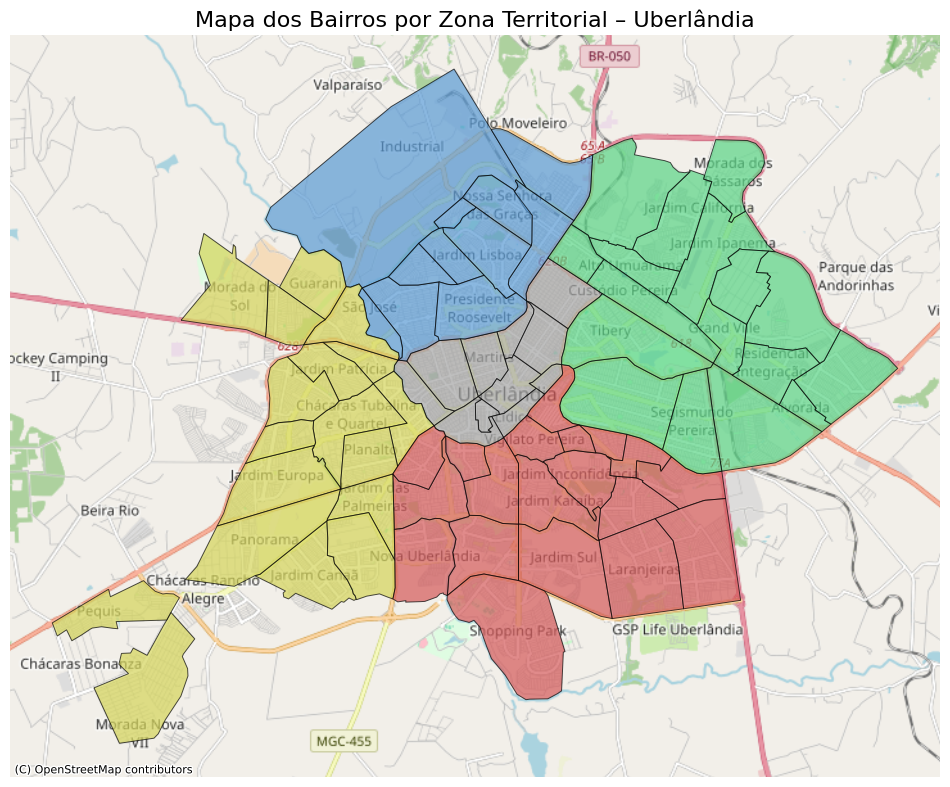

In [30]:
fig, ax = plt.subplots(figsize=(12, 12))
gdf_tmp.plot(ax=ax, color=gdf_tmp['cor'], edgecolor='black', linewidth=0.7, alpha=0.7)
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)
ax.set_title('Mapa dos Bairros por Zona Territorial – Uberlândia', fontsize=16)
ax.axis('off')
plt.show()


# 💾 Exportação dos Dados (Opcional)

Exporta o GeoDataFrame para um arquivo `.geojson` ou `.shp`, se desejar reaproveitar.


In [31]:
os.makedirs("../data", exist_ok=True)
gdf_tmp.to_file("../data/bairros_uberlandia.geojson", driver="GeoJSON")